In [1]:
import sqlite3
from sqlalchemy import create_engine
import pandas as pd

In [2]:
engine = create_engine('sqlite:///shop.db') # подключаемся к БД

# Считываем данные
categories = pd.read_sql(
    "SELECT * FROM categories",
    con=engine,
    index_col='id'
)

products = pd.read_sql(
    "SELECT * FROM products",
    con=engine,
    index_col='id'
)

sells = pd.read_sql(
    "SELECT * FROM sells",
    con=engine,
    index_col='id'
)
sells['sell_date'] = pd.to_datetime(sells['sell_date'])

suppliers = pd.read_sql(
    "SELECT * FROM suppliers",
    con=engine,
    index_col='id'
)

# sup_to_prod = pd.read_sql(
#     "SELECT * FROM sup_to_prod",
#     con=engine,
#     index_col='id'
# )

In [3]:
sells

,product_id,supplier_id,quantity,sell_date
id,,,,
0,42,1,33,2018-12-25
1,42,1,34,2018-12-26
2,42,1,68,2018-12-27
3,42,1,91,2018-12-28
4,42,1,81,2018-12-29
...,...,...,...,...
853585,72,20,35,2022-01-03
853586,72,20,7,2022-01-04
853587,72,20,38,2022-01-05


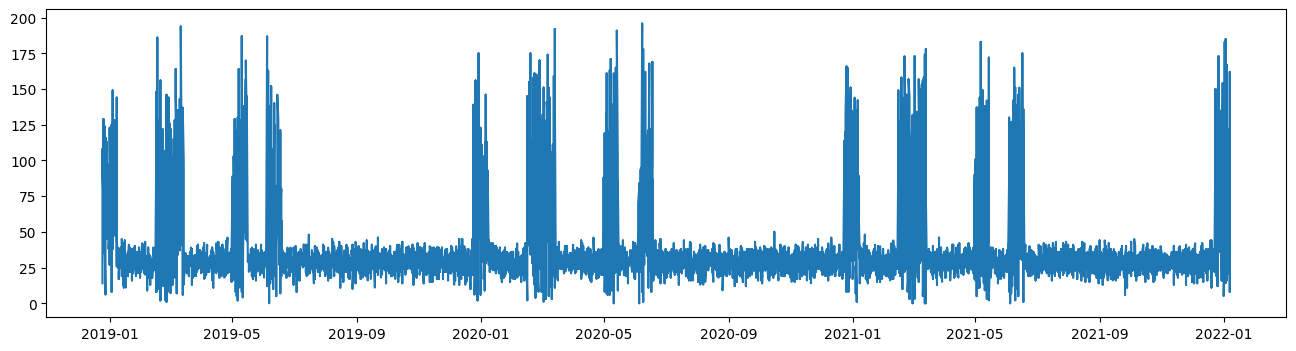

In [4]:
# АНАЛИЗ

import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))
prod_id = 50
data = sells[sells.product_id==prod_id].sort_values('sell_date')
plt.plot(data.sell_date, data.quantity)
plt.show()

# Ярко выражены всплески в праздничные дни